#  Statistical Power / Power Analysis
- Statistical Power is the probability of correctly detecting a true effect in an experiment.
- Mathematically, power is:
    - Power=1−P(TypeII Error) 
- A higher power means we are more likely to detect an effect if one truly exists.
- Power analysis helps determine the minimum sample size needed for an experiment.
<br>
### Why is Statistical Power Important?
- Ensures we don’t miss a true effect (avoids false negatives).
- Helps determine how many samples are needed for reliable conclusions.
- Balances experiment cost vs. accuracy.
<br>
### Key Components of Statistical Power
- <b>Effect Size</b>
    - The magnitude of the difference we expect to detect.
    - Larger effects → easier to detect (higher power).
    - Measured using:
        - Cohen’s d (for means)
        - Odds Ratio (for proportions)<br><br>
- <b>Sample Size (n)</b>
    - Larger samples reduce variability and increase power.<br><br>
- <b>Significance Level (Alpha, α)</b>
    - Lower α (e.g., 0.01) reduces false positives but lowers power.
    - Typical α = 0.05 in experiments.<br><br>
- <b>Variability in Data (σ)</b>
    - More variance → harder to detect effects → lower power.
    - Less variance → easier to detect effects → higher power.
<br>
### Types of Errors in Hypothesis Testing
- <b>Type I Error (False Positive, α)</b>
    - Rejecting H₀ when it's actually true.
    - Controlled by significance level (α).<br><br>
- <b>Type II Error (False Negative, β)</b>
    - Failing to reject H₀ when H₁ is true.
    - Lower power → higher Type II errors.<br><br>
- <b>Trade-Off Between α & Power</b>
    - Lowering α reduces Type I errors but reduces power.
    - Increasing power requires larger sample sizes.


# Conducting Power Analysis

In [15]:
import numpy as np
import pandas as pd

from statsmodels.stats.power import TTestIndPower

# Define parameters
effect_size = 0.5  # Medium effect size (Cohen's d)
alpha = 0.05       # Significance level
power = 0.8        # Desired power

# Compute required sample size
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

print(f"Required Sample Size: {int(sample_size)} per group")


Required Sample Size: 63 per group


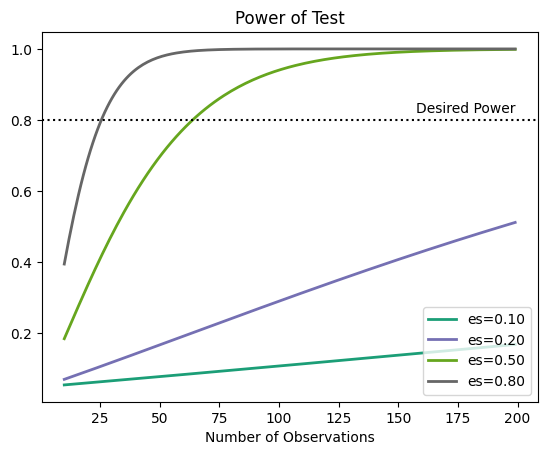

In [28]:
# Specify parameters for power analysis
sample_sizes = np.array(range(10, 200))
effect_sizes = np.array([0.1, 0.2, 0.5, 0.8])

# Plot power curves
TTestIndPower().plot_power(nobs=sample_sizes, effect_size=effect_sizes, alpha=alpha)
plt.axhline(y = power, color='black', linestyle='dotted', linewidth=1.5)
plt.text(sample_sizes.max(), power + 0.02, 'Desired Power', color='Black', fontsize=10, horizontalalignment='right')
plt.show()

# Simulating Power with Bootstrapping
- Monte Carlo Simulation to Estimate Power
- We generate many random experiments and compute how often we correctly reject H₀.

In [29]:
from scipy.stats import ttest_ind

# Simulate power for an experiment
def simulate_power(effect_size, sample_size, num_simulations=1000, alpha=0.05):
    power_count = 0
    for i in range(num_simulations):
        group_A = np.random.normal(50, 15, sample_size)
        group_B = np.random.normal(50 + effect_size * 15, 15, sample_size)
        t_stat, p_value = ttest_ind(group_A, group_B)
        if p_value < alpha:
            power_count += 1
    return power_count / num_simulations

# Compute power for sample size of 50
simulated_power = simulate_power(effect_size=0.5, sample_size=50)
print(f"Simulated Power: {simulated_power:.3f}")


Simulated Power: 0.672


# Power Analysis for Proportions
- Instead of means, we test proportions (e.g., conversion rates).

In [30]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Define baseline & expected conversion rates
p1 = 0.10  # Baseline conversion rate (Control)
p2 = 0.12  # Expected conversion rate (Treatment)

# Compute effect size for proportions
effect_size = proportion_effectsize(p1, p2)

# Compute required sample size
power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8)

print(f"Required Sample Size: {int(sample_size)} per group")

Required Sample Size: 3834 per group


# Best Practices & Validations
- Always perform power analysis before running an experiment.
- Use bootstrapping if data is not normally distributed.
- Larger sample sizes → more reliable results.
- Report power alongside p-values to avoid misinterpretation.